                                   TẢI VÀ CÀI ĐẶT THƯ VIỆN

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

ĐỌC FILE CSV

In [2]:
post_df_full = pd.read_csv('./datafallinluv.music.csv')

In [3]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        738 non-null    int64  
 1   text                           736 non-null    object 
 2   post_text                      736 non-null    object 
 3   shared_text                    11 non-null     object 
 4   original_text                  10 non-null     object 
 5   time                           738 non-null    object 
 6   timestamp                      728 non-null    float64
 7   image                          162 non-null    object 
 8   image_lowquality               734 non-null    object 
 9   images                         736 non-null    object 
 10  images_description             736 non-null    object 
 11  images_lowquality              738 non-null    object 
 12  images_lowquality_description  738 non-null    obj

In [4]:
post_df_full

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,880583380352045,"Hi mọi người, những bài hát cover US-UK do tea...","Hi mọi người, những bài hát cover US-UK do tea...",NaN,NaN,2023-11-03 12:10:41,1.698988e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 659, 'love': 276, 'care': 7, 'sad': 4}",946,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 21:07:07.167434
1,879158750494508,Côm bách cùng với một chiếc avatar xinh xẻo nè...,Côm bách cùng với một chiếc avatar xinh xẻo nè...,NaN,Côm bách cùng với một chiếc avatar xinh xẻo nè...,2023-10-31 19:50:50,1.698757e+09,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1690, 'love': 511, 'haha': 10, 'wow':...",2232,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 21:07:11.355443
2,875098774233839,"Hôm nay là sinh nhật của mình, mọi người chúc ...","Hôm nay là sinh nhật của mình, mọi người chúc ...",NaN,NaN,2023-10-23 23:59:20,1.698080e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/m1/v/t...,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1535, 'love': 784, 'haha': 16, 'wow':...",2376,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 21:07:19.584075
3,869430291467354,Say you'll remember me ❤ #fallinluv #vietsub #...,Say you'll remember me ❤ #fallinluv #vietsub #...,NaN,NaN,2023-10-13 21:27:09,1.697207e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1667, 'love': 418, 'haha': 2, 'care':...",2097,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 21:07:28.049701
4,868843778192672,There’s a girl but I let her get away... #fall...,There’s a girl but I let her get away... #fall...,NaN,NaN,2023-10-12 21:53:30,1.697122e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1193, 'love': 158, 'haha': 3, 'care':...",1366,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 21:07:32.993743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,394918175585237,"Đây là tui khi nghe được bài tủ :"">","Đây là tui khi nghe được bài tủ :"">",NaN,NaN,2021-09-24 18:10:45,1.632482e+09,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 581, 'love': 367, 'haha': 19, 'care': 8}",975,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 23:41:44.329348
734,394755038934884,If you're leaving baby let me down slowly...,If you're leaving baby let me down slowly...,NaN,NaN,2021-09-24 11:59:02,1.632460e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 674, 'love': 246, 'haha': 1, 'care': ...",936,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 23:41:49.297226
735,394284388981949,Em chỉ cần một người như vậy thôi là đủ 😊,Em chỉ cần một người như vậy thôi là đủ 😊,NaN,NaN,2021-09-23 19:53:24,1.632402e+09,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1129, 'love': 554, 'haha': 1, 'wow': ...",1702,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 23:41:52.922996
736,394033922340329,𝑰 𝒅𝒐𝒏'𝒕 𝒌𝒏𝒐𝒘 𝒘𝒉𝒐 𝑰 𝒂𝒎...,𝑰 𝒅𝒐𝒏'𝒕 𝒌𝒏𝒐𝒘 𝒘𝒉𝒐 𝑰 𝒂𝒎...,NaN,NaN,2021-09-23 11:39:49,1.632372e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/fallinluv.music/posts...,"{'like': 1548, 'love': 341, 'haha': 5, 'care':...",2138,NaN,103573238048880,NaN,NaN,[],False,2023-11-13 23:41:57.924915


                                     LÀM SẠCH DỮ LIỆU

In [5]:
post_df_full=post_df_full.dropna(subset='reactions')

In [6]:
del post_df_full['likes']

    XÓA CÁC CỘT CHỈ CÓ GIÁ TRỊ NA

In [7]:
post_df_full=post_df_full.dropna(axis=1,how='all')
post_df_full

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactors,w3_fb_url,reactions,reaction_count,with,page_id,image_id,image_ids,was_live,fetched_time
0,880583380352045,"Hi mọi người, những bài hát cover US-UK do tea...","Hi mọi người, những bài hát cover US-UK do tea...",NaN,NaN,2023-11-03 12:10:41,1.698988e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,[],https://www.facebook.com/fallinluv.music/posts...,"{'like': 659, 'love': 276, 'care': 7, 'sad': 4}",946,NaN,103573238048880,NaN,[],False,2023-11-13 21:07:07.167434
1,879158750494508,Côm bách cùng với một chiếc avatar xinh xẻo nè...,Côm bách cùng với một chiếc avatar xinh xẻo nè...,NaN,Côm bách cùng với một chiếc avatar xinh xẻo nè...,2023-10-31 19:50:50,1.698757e+09,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,"[{'name': 'Chii Mai', 'link': 'https://faceboo...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 1690, 'love': 511, 'haha': 10, 'wow':...",2232,NaN,103573238048880,NaN,[],False,2023-11-13 21:07:11.355443
2,875098774233839,"Hôm nay là sinh nhật của mình, mọi người chúc ...","Hôm nay là sinh nhật của mình, mọi người chúc ...",NaN,NaN,2023-10-23 23:59:20,1.698080e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/m1/v/t...,[],...,"[{'name': 'Như Mộng', 'link': 'https://faceboo...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 1535, 'love': 784, 'haha': 16, 'wow':...",2376,NaN,103573238048880,NaN,[],False,2023-11-13 21:07:19.584075
3,869430291467354,Say you'll remember me ❤ #fallinluv #vietsub #...,Say you'll remember me ❤ #fallinluv #vietsub #...,NaN,NaN,2023-10-13 21:27:09,1.697207e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,"[{'name': 'Vann Thanh', 'link': 'https://faceb...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 1667, 'love': 418, 'haha': 2, 'care':...",2097,NaN,103573238048880,NaN,[],False,2023-11-13 21:07:28.049701
4,868843778192672,There’s a girl but I let her get away... #fall...,There’s a girl but I let her get away... #fall...,NaN,NaN,2023-10-12 21:53:30,1.697122e+09,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,"[{'name': 'Inoue Miyuri', 'link': 'https://fac...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 1193, 'love': 158, 'haha': 3, 'care':...",1366,NaN,103573238048880,NaN,[],False,2023-11-13 21:07:32.993743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,394918175585237,"Đây là tui khi nghe được bài tủ :"">","Đây là tui khi nghe được bài tủ :"">",NaN,NaN,2021-09-24 18:10:45,1.632482e+09,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,"[{'name': 'Thùy An', 'link': 'https://facebook...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 581, 'love': 367, 'haha': 19, 'care': 8}",975,NaN,103573238048880,NaN,[],False,2023-11-13 23:41:44.329348
734,394755038934884,If you're leaving baby let me down slowly...,If you're leaving baby let me down slowly...,NaN,NaN,2021-09-24 11:59:02,1.632460e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,"[{'name': 'Thùy An', 'link': 'https://facebook...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 674, 'love': 246, 'haha': 1, 'care': ...",936,NaN,103573238048880,NaN,[],False,2023-11-13 23:41:49.297226
735,394284388981949,Em chỉ cần một người như vậy thôi là đủ 😊,Em chỉ cần một người như vậy thôi là đủ 😊,NaN,NaN,2021-09-23 19:53:24,1.632402e+09,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,"[{'name': 'Thùy An', 'link': 'https://facebook...",https://www.facebook.com/fallinluv.music/posts...,"{'like': 1129, 'love': 554, 'haha': 1, 'wow': ...",1702,NaN,103573238048880,NaN,[],False,2023-11-13 23:41:52.922996
736,394033922340329,𝑰 𝒅𝒐𝒏'𝒕 𝒌𝒏𝒐𝒘 𝒘𝒉𝒐 𝑰 𝒂𝒎...,𝑰 𝒅𝒐𝒏'𝒕 𝒌𝒏𝒐𝒘 𝒘𝒉𝒐 𝑰 𝒂𝒎...,NaN,NaN,2021-09-23 11:39:49,1.632372e+09,NaN,https://scontent.fhan14-1.fna.fbcdn.n

In [8]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        738 non-null    int64  
 1   text                           736 non-null    object 
 2   post_text                      736 non-null    object 
 3   shared_text                    11 non-null     object 
 4   original_text                  10 non-null     object 
 5   time                           738 non-null    object 
 6   timestamp                      728 non-null    float64
 7   image                          162 non-null    object 
 8   image_lowquality               734 non-null    object 
 9   images                         736 non-null    object 
 10  images_description             736 non-null    object 
 11  images_lowquality              738 non-null    object 
 12  images_lowquality_description  738 non-null    obj

In [9]:
post_df_full['text']=post_df_full['text'].fillna('none')
post_df_full['post_text']=post_df_full['post_text'].fillna('none')


In [10]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])
post_df_full['month'] = post_df_full['time'].dt.month
post_df_full['day']= post_df_full['time'].dt.day
post_df_full['year']=post_df_full['time'].dt.year
post_df_full[['day','month','year']]

,day,month,year
0,3,11,2023
1,31,10,2023
2,23,10,2023
3,13,10,2023
4,12,10,2023
...,...,...,...
733,24,9,2021
734,24,9,2021
735,23,9,2021
736,23,9,2021


                                     PHÂN TÍCH DỮ LIỆU
                                  

In [11]:
post_df_full.describe()

,post_id,time,timestamp,video_id,comments,shares,user_id,shared_post_id,shared_user_id,reaction_count,page_id,image_id,month,day,year
count,7.380000e+02,738,7.280000e+02,5.570000e+02,738.000000,738.000000,7.380000e+02,8.000000e+00,8.000000e+00,738.000000,7.380000e+02,1.490000e+02,738.000000,738.000000,738.000000
mean,6.135027e+14,2022-08-08 15:35:40.597561088,1.659724e+09,1.150559e+15,303.860434,392.623306,1.026047e+14,2.663999e+14,1.024788e+14,8274.956640,1.035732e+14,6.560735e+14,6.421409,15.753388,2022.109756
min,3.940229e+14,2021-09-23 11:12:06,1.632370e+09,1.173147e+14,0.000000,0.000000,1.000520e+14,1.890184e+14,1.000693e+14,122.000000,1.035732e+14,2.159164e+14,1.000000,1.000000,2021.000000
25%,4.877687e+14,2022-01-28 01:05:56.500000,1.643153e+09,4.714999e+14,23.000000,40.000000,1.000520e+14,1.898771e+14,1.022539e+14,1494.250000,1.035732e+14,5.617615e+14,4.000000,8.000000,2022.000000
50%,6.039149e+14,2022-07-22 15:52:49.500000,1.658236e+09,7.473010e+14,66.000000,103.500000,1.035732e+14,2.040138e+14,1.032838e+14,2866.000000,1.035732e+14,7.182165e+14,6.000000,15.000000,2022.000000
75%,7.424840e+14,2023-02-02 15:51:12.500000,1.673810e+09,1.266782e+15,205.000000,275.250000,1.035732e+14,3.299581e+14,1.032838e+14,7515.000000,1.035732e+14,7.703858e+14,10.000000,23.000000,2023.000000
max,8.805834e+14,2023-11-03 12:10:41,1.698988e+09,7.154918e+15,21000.000000,10000.000000,1.035732e+14,4.886576e+14,1.035732e+14,264445.000000,1.035732e+14,8.384118e+14,12.000000,31.000000,2023.000000
std,1.314913e+14,NaN,1.729272e+07,1.167123e+15,1115.800045,991.501312,1.573464e+12,1.096354e+14,1.494826e+12,18149.774141,0.000000e+00,1.281049e+14,3.628984,8.637201,0.704810


    BIỂU ĐỒ PHÂN TÁN GIỮA POST_ID VÀ SHARED_POST_ID

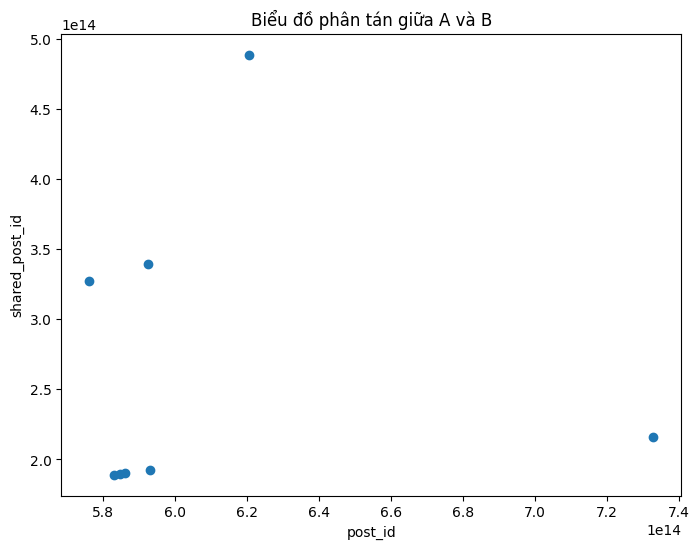

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(post_df_full['post_id'], post_df_full['shared_post_id'])
plt.xlabel('post_id')
plt.ylabel('shared_post_id')
plt.title('Biểu đồ phân tán giữa A và B')
plt.show()

    REACTIONS

In [13]:
post_df_full['reaction_count'].sum()

6106918

In [14]:
post_df_full['reaction_count'].mean()

8274.956639566395

In [15]:
post_df_full[['post_id','reactions']]

,post_id,reactions
0,880583380352045,"{'like': 659, 'love': 276, 'care': 7, 'sad': 4}"
1,879158750494508,"{'like': 1690, 'love': 511, 'haha': 10, 'wow':..."
2,875098774233839,"{'like': 1535, 'love': 784, 'haha': 16, 'wow':..."
3,869430291467354,"{'like': 1667, 'love': 418, 'haha': 2, 'care':..."
4,868843778192672,"{'like': 1193, 'love': 158, 'haha': 3, 'care':..."
...,...,...
733,394918175585237,"{'like': 581, 'love': 367, 'haha': 19, 'care': 8}"
734,394755038934884,"{'like': 674, 'love': 246, 'haha': 1, 'care': ..."
735,394284388981949,"{'like': 1129, 'love': 554, 'haha': 1, 'wow': ..."
736,394033922340329,"{'like': 1548, 'love': 341, 'haha': 5, 'care':..."


In [16]:
post_df_full[['time','timestamp','reaction_count']]

,time,timestamp,reaction_count
0,2023-11-03 12:10:41,1.698988e+09,946
1,2023-10-31 19:50:50,1.698757e+09,2232
2,2023-10-23 23:59:20,1.698080e+09,2376
3,2023-10-13 21:27:09,1.697207e+09,2097
4,2023-10-12 21:53:30,1.697122e+09,1366
...,...,...,...
733,2021-09-24 18:10:45,1.632482e+09,975
734,2021-09-24 11:59:02,1.632460e+09,936
735,2021-09-23 19:53:24,1.632402e+09,1702
736,2021-09-23 11:39:49,1.632372e+09,2138


In [17]:
ax= post_df_full['timestamp'].to_list()
ay= post_df_full['reaction_count'].to_list()
ax.reverse()
ay.reverse()
print(len(ax),len(ay))
print(ax)
print(ay)

738 738
[1632370326.0, 1632371989.0, 1632401604.0, 1632459542.0, 1632481845.0, 1632547954.0, 1632658638.0, 1632719542.0, 1632745257.0, 1632806405.0, 1632831969.0, 1633238625.0, 1633267032.0, 1633325376.0, 1633348883.0, 1633353912.0, 1633357467.0, 1633410308.0, 1633435220.0, 1633498212.0, 1633523024.0, 1633529873.0, 1633585095.0, 1633608869.0, 1633670521.0, 1633695914.0, 1633710192.0, 1633786753.0, 1633843567.0, 1633867745.0, 1633930027.0, 1633958749.0, 1634047781.0, 1634128090.0, 1634214051.0, 1634275125.0, 1634304646.0, 1634389344.0, 1634397060.0, 1634447122.0, 1634471929.0, 1634477194.0, 1634562144.0, 1634646952.0, 1634709744.0, 1634818683.0, 1634882408.0, 1634905181.0, 1634968158.0, 1635074050.0, 1635164305.0, 1635400863.0, 1635487294.0, 1635594301.0, 1635658780.0, 1635682678.0, 1635696424.0, 1635834644.0, 1635941453.0, 1635945429.0, 1635953921.0, 1636120829.0, 1636461605.0, 1636607396.0, 1636720420.0, 1636954723.0, 1636978458.0, 1637153557.0, 1637213490.0, 1637242369.0, 1637759994.

BIỂU ĐỒ THỂ HIỆN HIỆU SUẤT REACTION CỦA CÁC BÀI ĐĂNG

<function matplotlib.pyplot.show(close=None, block=None)>

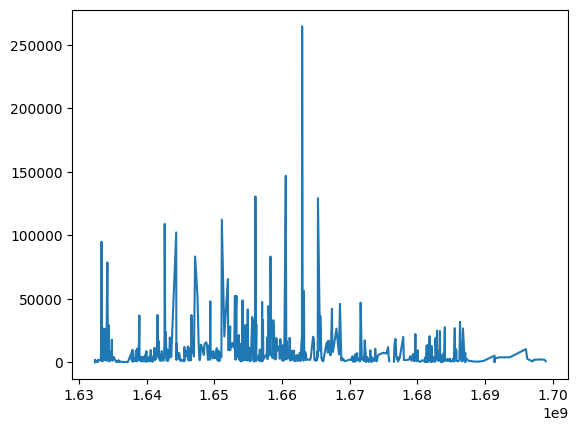

In [18]:
plt.plot(ax,ay)
plt.show

In [19]:
post_df_full['reactions'].tolist()

["{'like': 659, 'love': 276, 'care': 7, 'sad': 4}",
 "{'like': 1690, 'love': 511, 'haha': 10, 'wow': 1, 'care': 19, 'sad': 1}",
 "{'like': 1535, 'love': 784, 'haha': 16, 'wow': 4, 'care': 34, 'sad': 3}",
 "{'like': 1667, 'love': 418, 'haha': 2, 'care': 8, 'sad': 2}",
 "{'like': 1193, 'love': 158, 'haha': 3, 'care': 3, 'sad': 9}",
 "{'like': 1086, 'love': 202, 'care': 4, 'sad': 3}",
 "{'like': 507, 'love': 102, 'haha': 164, 'wow': 2, 'care': 5, 'sad': 4}",
 "{'like': 1957, 'love': 847, 'haha': 7, 'care': 19, 'sad': 32}",
 "{'like': 6586, 'love': 3755, 'haha': 23, 'wow': 4, 'care': 109, 'sad': 10}",
 "{'like': 2730, 'love': 87, 'haha': 26, 'wow': 4, 'care': 12, 'sad': 1223, 'angry': 3}",
 "{'like': 1752, 'love': 42, 'haha': 2107, 'wow': 20, 'care': 6, 'sad': 103, 'angry': 1}",
 "{'like': 1231, 'love': 22, 'haha': 1410, 'wow': 9, 'care': 9, 'sad': 267, 'angry': 2}",
 "{'like': 1613, 'love': 534, 'haha': 23, 'care': 16, 'sad': 4}",
 "{'like': 82, 'love': 31, 'haha': 33, 'care': 3, 'sad': 3

TÁCH CÁC KEY REACTIONS THÀNH CÁC CỘT

In [20]:
a= post_df_full['reactions'].apply(lambda x: dict(eval(x)))
b=a.apply(pd.Series)
post_df_full=pd.concat([post_df_full,b],axis=1)


In [21]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,880583380352045,659.0,276.0,NaN,7.0,4.0,NaN,NaN
1,879158750494508,1690.0,511.0,10.0,19.0,1.0,1.0,NaN
2,875098774233839,1535.0,784.0,16.0,34.0,3.0,4.0,NaN
3,869430291467354,1667.0,418.0,2.0,8.0,2.0,NaN,NaN
4,868843778192672,1193.0,158.0,3.0,3.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...
733,394918175585237,581.0,367.0,19.0,8.0,NaN,NaN,NaN
734,394755038934884,674.0,246.0,1.0,7.0,8.0,NaN,NaN
735,394284388981949,1129.0,554.0,1.0,16.0,1.0,1.0,NaN
736,394033922340329,1548.0,341.0,5.0,6.0,238.0,NaN,NaN


THAY CÁC GIÁ TRỊ NONE BẰNG 0

In [22]:
post_df_full[['like','love','haha','care','sad','wow','angry']]=post_df_full[['like','love','haha','care','sad','wow','angry']].fillna(0)

In [23]:
post_df_full[['post_id','like','love','haha','care','sad','wow','angry']]

,post_id,like,love,haha,care,sad,wow,angry
0,880583380352045,659.0,276.0,0.0,7.0,4.0,0.0,0.0
1,879158750494508,1690.0,511.0,10.0,19.0,1.0,1.0,0.0
2,875098774233839,1535.0,784.0,16.0,34.0,3.0,4.0,0.0
3,869430291467354,1667.0,418.0,2.0,8.0,2.0,0.0,0.0
4,868843778192672,1193.0,158.0,3.0,3.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...
733,394918175585237,581.0,367.0,19.0,8.0,0.0,0.0,0.0
734,394755038934884,674.0,246.0,1.0,7.0,8.0,0.0,0.0
735,394284388981949,1129.0,554.0,1.0,16.0,1.0,1.0,0.0
736,394033922340329,1548.0,341.0,5.0,6.0,238.0,0.0,0.0


BÀI VIẾT CÓ LƯỢT ANGRY CAO NHẤT

In [24]:
a= post_df_full['angry'].max()
a

25.0

In [25]:
post_df_full.loc[a,'post_text']

'Tóm tắt nhanh về Avicii ❤️ #fallinluv #vietsub #music #Avicii'

BÀI VIẾT CÓ LƯỢT LOVE THẤP NHẤT

In [26]:
b=post_df_full['love'].min()
b

1.0

In [27]:
post_df_full.loc[b, 'post_text']

'Côm bách cùng với một chiếc avatar xinh xẻo nè cả nhà iuuuu 🙆\n\nCuddling with a cute avatar, everyone 🙆'

BIỂU ĐỒ REACTIONS

In [28]:
a=post_df_full[['like','love','haha','care','sad','wow','angry']].sum()
a=a.to_dict()

Text(0.5, 0, 'Type of Reaction')

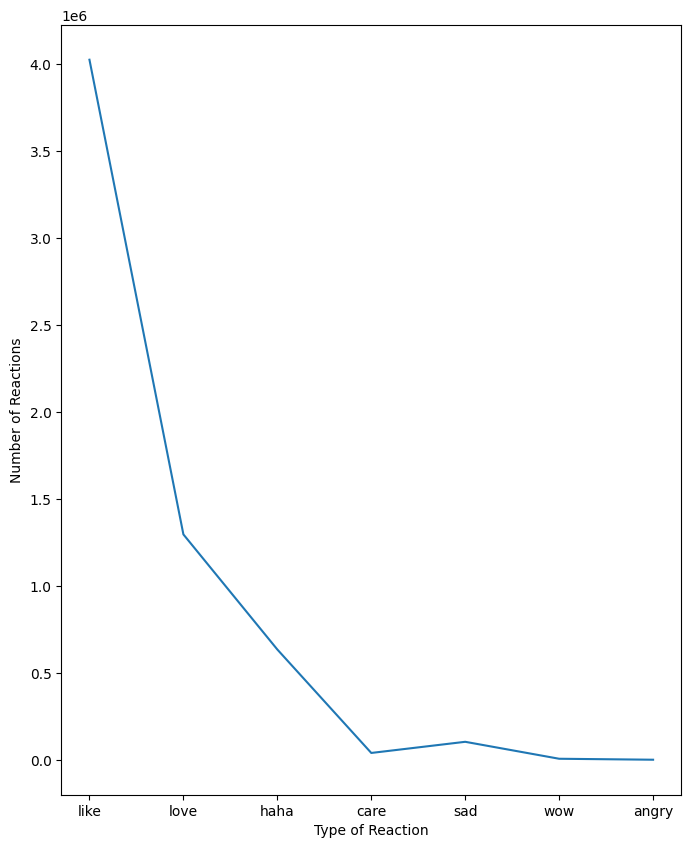

In [29]:

fig, ax = plt.subplots(figsize=(8,10))
ax = sns.lineplot(x=list(a.keys()), y=list(a.values()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")


BIỂU ĐỒ LƯỢNG REACTION CỦA CÁC THÁNG TRONG NĂM 2023

In [30]:
a=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2023),'reaction_count'].sum()
    a.append(b)
print(a)

[114530, 210388, 110629, 231325, 190121, 109334, 2563, 14693, 14572, 13012, 946, 0]


In [31]:
dict={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict[key[i]]=a[i]
print(dict)

{'T1': 114530, 'T2': 210388, 'T3': 110629, 'T4': 231325, 'T5': 190121, 'T6': 109334, 'T7': 2563, 'T8': 14693, 'T9': 14572, 'T10': 13012, 'T11': 946, 'T12': 0}


Text(0.5, 0, '2023')

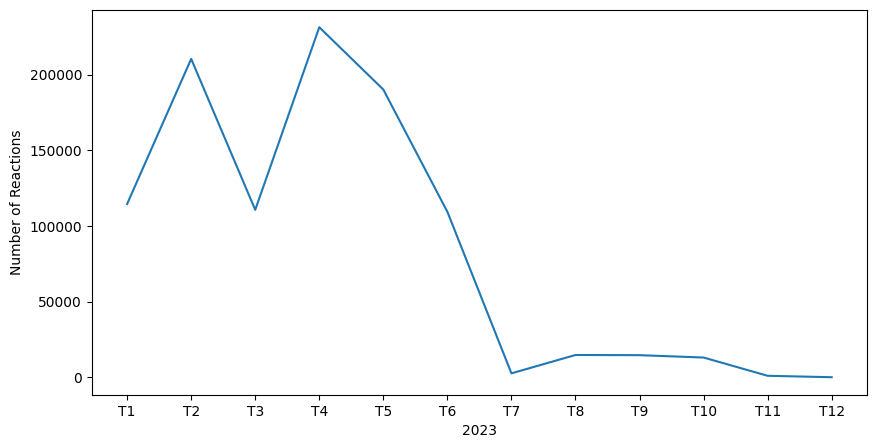

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()))
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("2023")

BIỂU ĐỒ REACTIONS 2023 VÀ 2022

In [33]:
x=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2022),'reaction_count'].sum()
    x.append(b)
print(x)

[396898, 201898, 326644, 330480, 466190, 580852, 600702, 392273, 404131, 304449, 155601, 132207]


In [34]:
dict1={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict1[key[i]]=x[i]
print(dict1)

{'T1': 396898, 'T2': 201898, 'T3': 326644, 'T4': 330480, 'T5': 466190, 'T6': 580852, 'T7': 600702, 'T8': 392273, 'T9': 404131, 'T10': 304449, 'T11': 155601, 'T12': 132207}


Text(0.5, 0, 'Month')

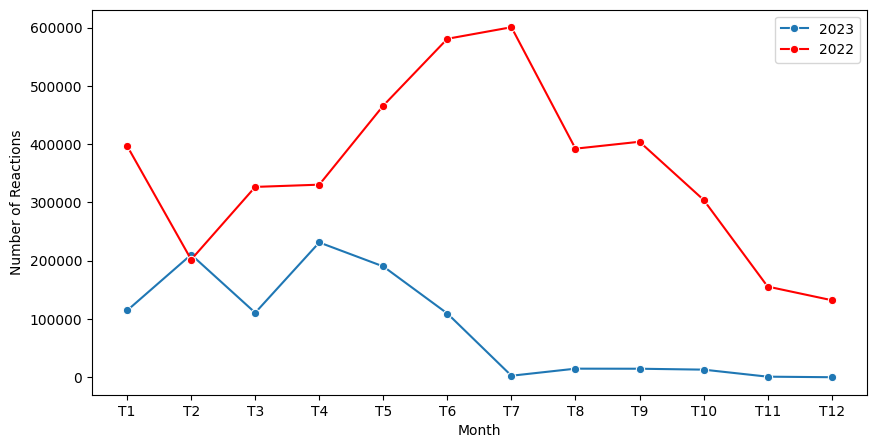

In [35]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()),label='2023',marker='o')
ax= sns.lineplot(x=list(dict1.keys()),y= list(dict1.values()),color='red',marker='o',label='2022')
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Month")

    COMMENTS

In [36]:
post_df_full['comments'].sum()

224249

In [37]:
a=post_df_full['comments_full'].value_counts()
a

comments_full
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

    BÀI VIẾT


In [38]:
df_text = post_df_full[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text

,post_id,post_text
0,880583380352045,"Hi mọi người, những bài hát cover US-UK do tea..."
1,879158750494508,Côm bách cùng với một chiếc avatar xinh xẻo nè...
2,875098774233839,"Hôm nay là sinh nhật của mình, mọi người chúc ..."
3,869430291467354,Say you'll remember me ❤ #fallinluv #vietsub #...
4,868843778192672,There’s a girl but I let her get away... #fall...
...,...,...
733,394918175585237,"Đây là tui khi nghe được bài tủ :"">"
734,394755038934884,If you're leaving baby let me down slowly...
735,394284388981949,Em chỉ cần một người như vậy thôi là đủ 😊
736,394033922340329,𝑰 𝒅𝒐𝒏'𝒕 𝒌𝒏𝒐𝒘 𝒘𝒉𝒐 𝑰 𝒂𝒎...


SỐ LUỌNG BÀI VIẾT THEO TỪNG REACTIONS

In [39]:
a=[]
b=['like','love','sad','care','angry','haha','wow']
for i in b:
    x=post_df_full.loc[post_df_full[i]!=0.0,'post_text'].shape[0]
    a.append(x)
print(a)
dict2={}
for i in range(len(b)):
    dict2[b[i]]=a[i]
print(dict2)

[738, 738, 669, 724, 198, 700, 515]
{'like': 738, 'love': 738, 'sad': 669, 'care': 724, 'angry': 198, 'haha': 700, 'wow': 515}


BIỂU ĐỒ

Text(0.5, 0, 'Reactions')

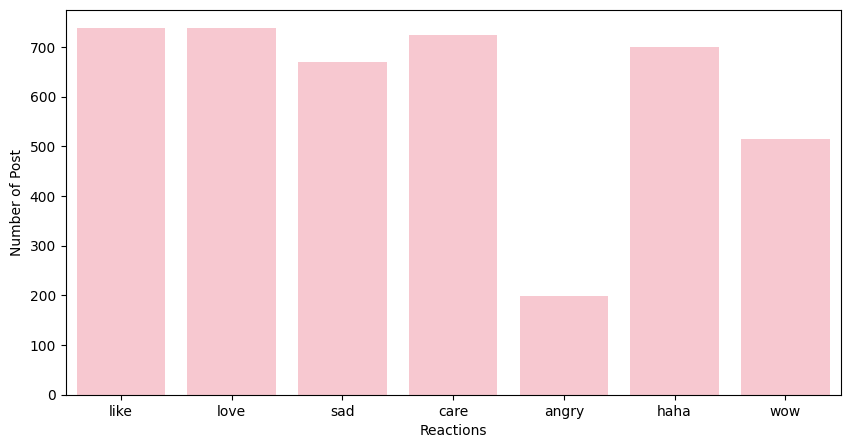

In [40]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.barplot(x=list(dict2.keys()), y=list(dict2.values()),color='pink')
ax.set_ylabel("Number of Post")
ax.set_xlabel("Reactions")

BIỂU ĐỒ SO SÁNH SỐ LƯỢNG BÀI VIẾT NĂM 2022 VÀ 2023

In [41]:
a=[]
for i in range(1,13):
    b=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2022)].shape[0]
    a.append(b)
print(a)
dict={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict[key[i]]=a[i]
print(dict)

[42, 20, 23, 28, 32, 46, 43, 43, 21, 23, 12, 30]
{'T1': 42, 'T2': 20, 'T3': 23, 'T4': 28, 'T5': 32, 'T6': 46, 'T7': 43, 'T8': 43, 'T9': 21, 'T10': 23, 'T11': 12, 'T12': 30}


In [42]:
a1=[]
for i in range(1,13):
    b1=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2023)].shape[0]
    a1.append(b1)
print(a1)

[43, 25, 22, 66, 38, 16, 3, 5, 2, 7, 1, 0]


In [43]:
dict1={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict1[key[i]]=a1[i]
print(dict1)

{'T1': 43, 'T2': 25, 'T3': 22, 'T4': 66, 'T5': 38, 'T6': 16, 'T7': 3, 'T8': 5, 'T9': 2, 'T10': 7, 'T11': 1, 'T12': 0}


BIỂU ĐỒ

Text(0.5, 0, 'Month')

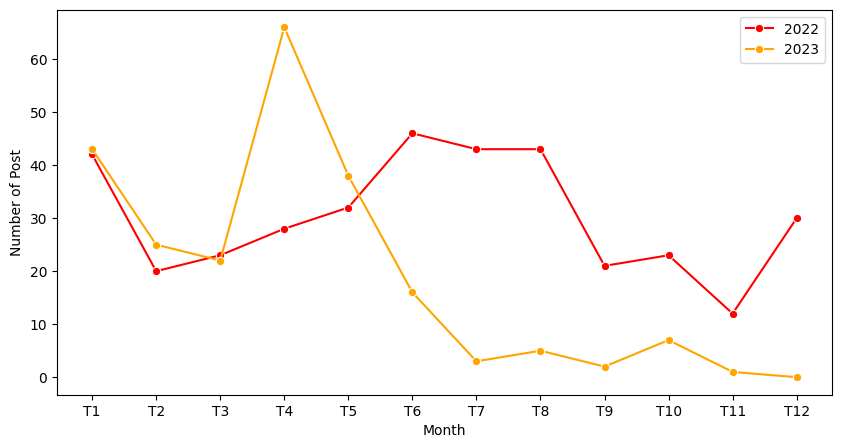

In [44]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()),color='red',label='2022',marker='o')
ax= sns.lineplot(x=list(dict1.keys()),y= list(dict1.values()),color='orange',marker='o',label='2023')
ax.set_ylabel("Number of Post")
ax.set_xlabel("Month")

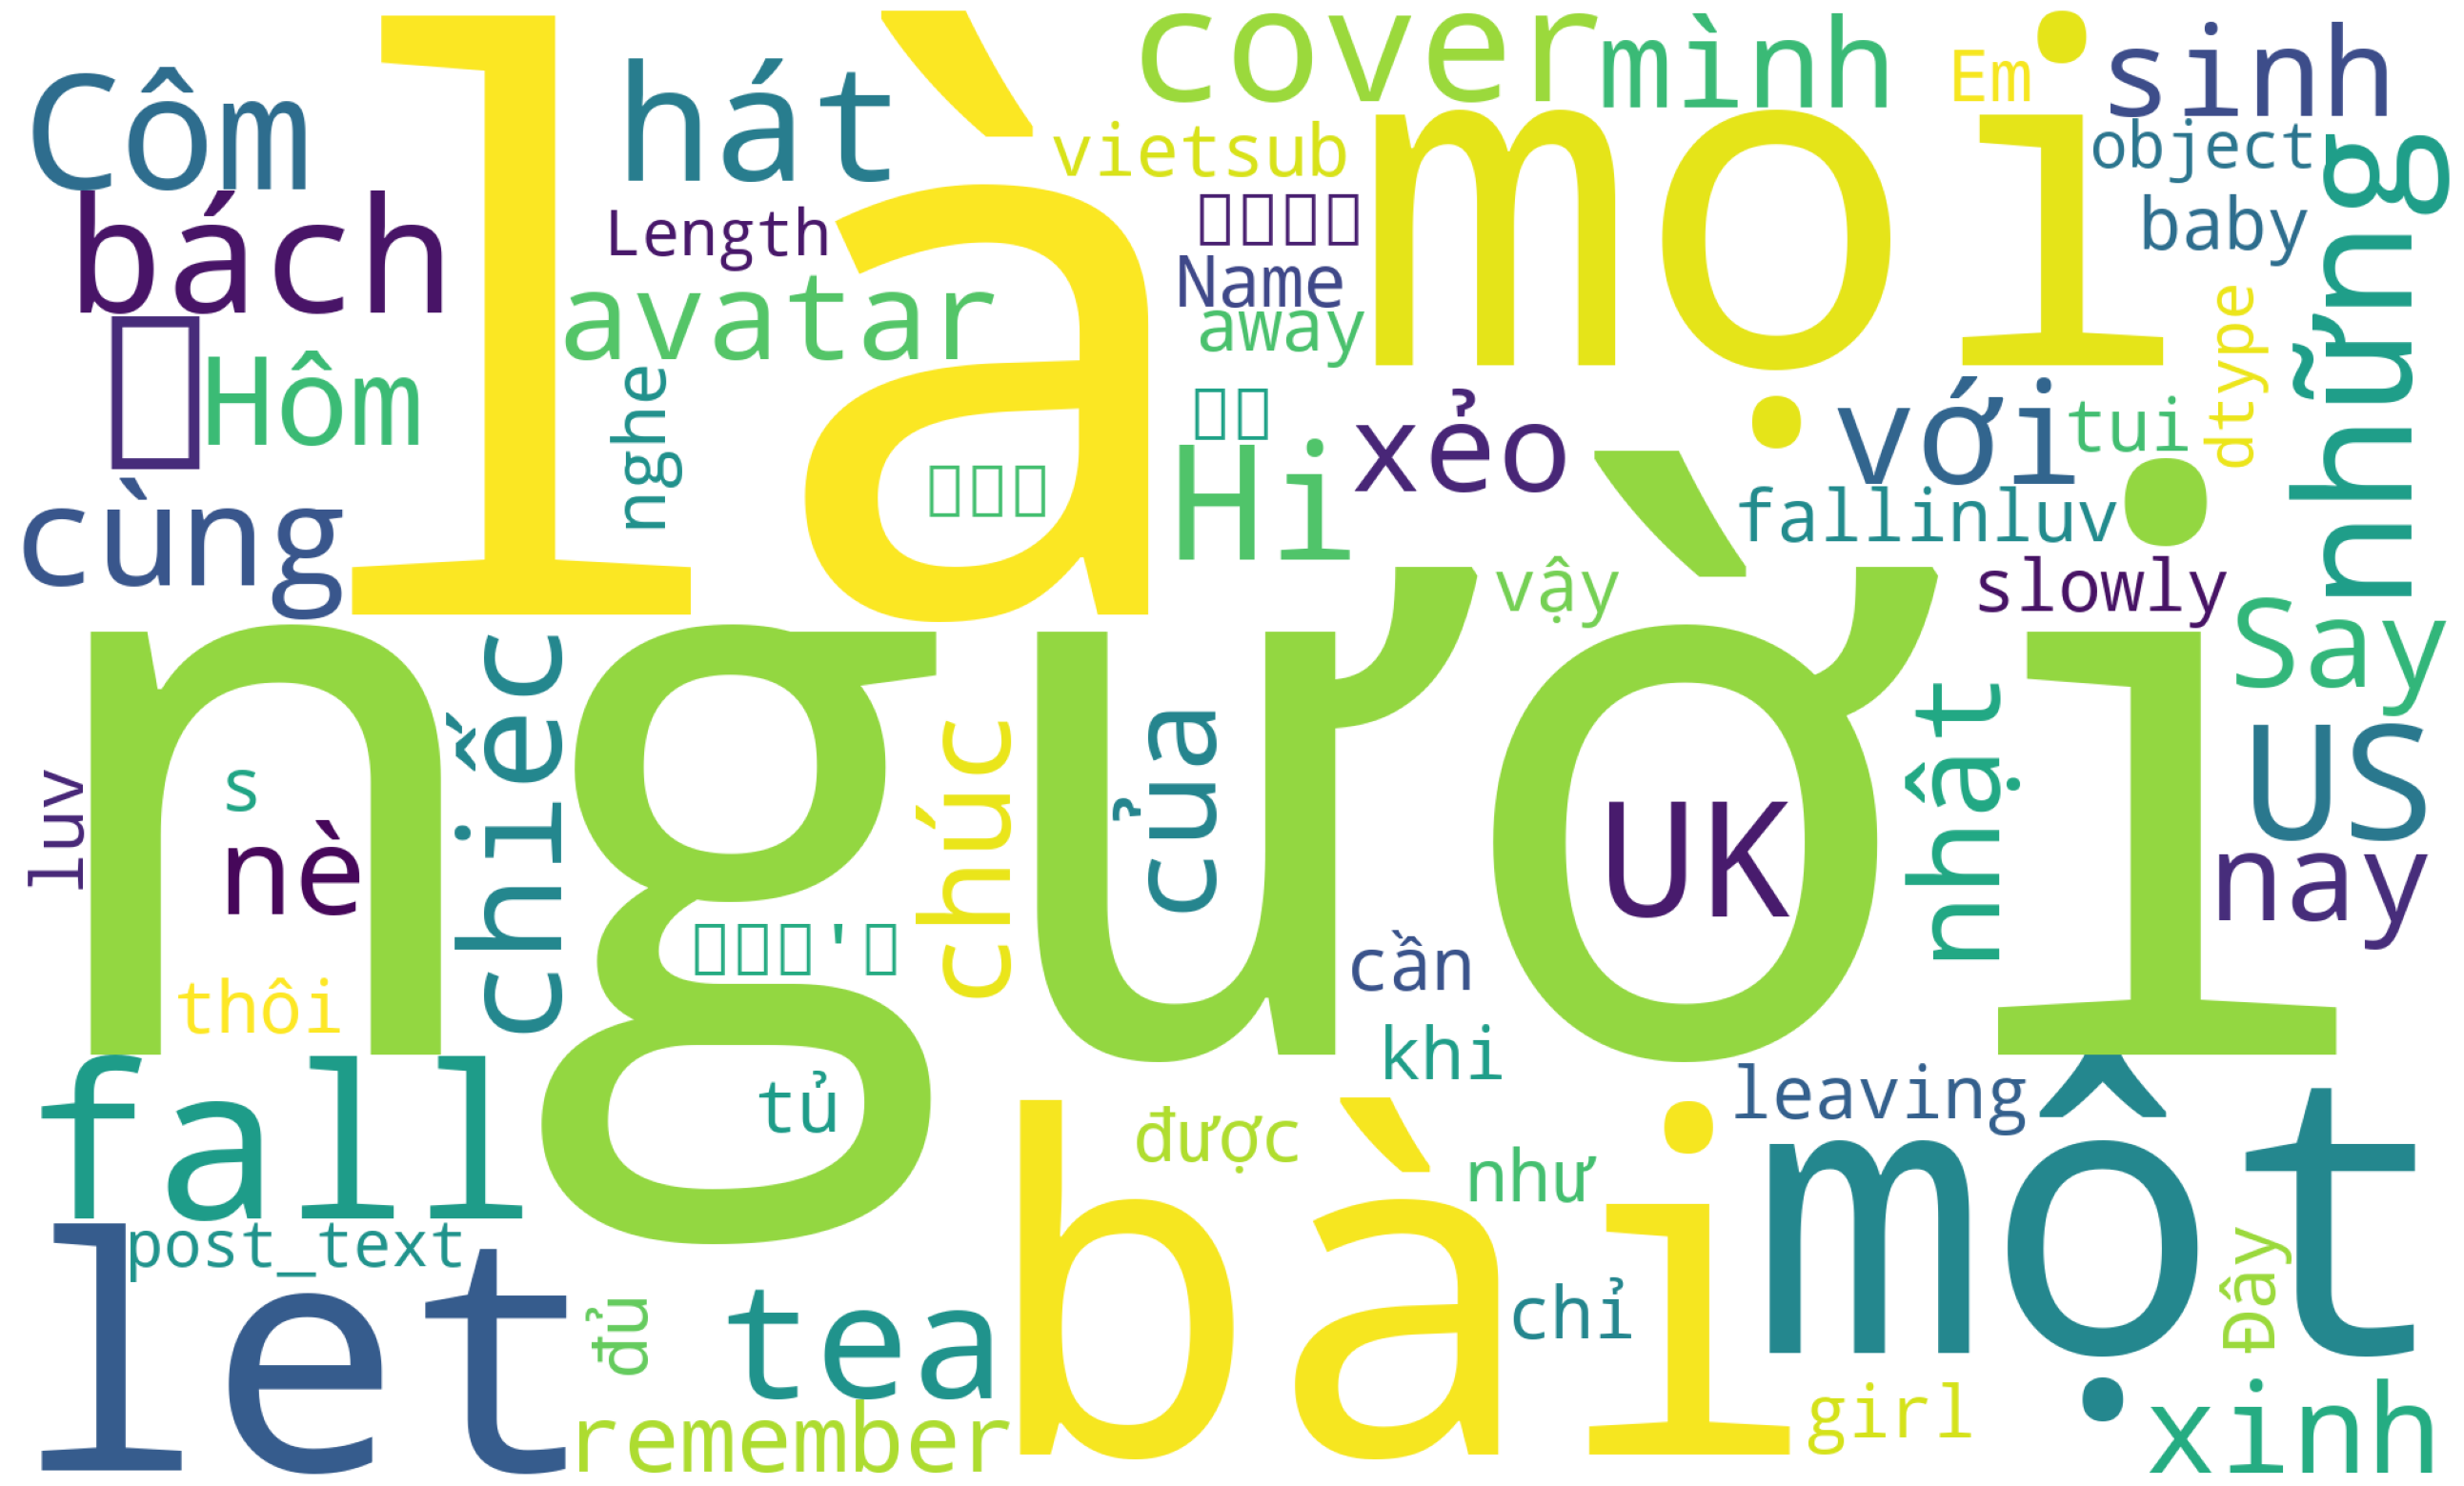

In [45]:
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=300,width=2000, height=1200).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


ĐẾM SỐ LƯỢNG BÀI VIẾT CHỨA TỪ KHÓA

In [46]:
x= post_df_full['text'].tolist()
x

['Hi mọi người, những bài hát cover US-UK do team bọn mình tự hát và phối lại cần lắm một net để trú chân, ai quen biết có thể giới thiệu giúp bọn mình với ạ, cảm ơn mọi người rất nhiều.\n\nDưới đây là bài hát Just Say Hello do team nhà Fall cover, mời mọi người nghe qua ❤',
 'Côm bách cùng với một chiếc avatar xinh xẻo nè cả nhà iuuuu 🙆\n\nCuddling with a cute avatar, everyone 🙆',
 'Hôm nay là sinh nhật của mình, mọi người chúc một câu gì đó đi 🥺',
 "Say you'll remember me ❤ #fallinluv #vietsub #lyrics",
 'There’s a girl but I let her get away... #fallinluv #vietsub #lyrics',
 'All I need is a little love in my life... #fallinluv #vietsub #lyrics',
 'Nghe nhạc thôi chứ đừng đọc sub nha mọi người 😈',
 'Each day goes by and each night, I cry...',
 'Song from 12 years ago ❤',
 'Rồi sẽ đến lúc tụi mình rời bỏ mọi người như Sorry Musicc. đã từng…',
 'Chuẩn bị lấy chồng nên hông muốn làm vietsub nữa, bá.n fanpage chia đều cho những người anh em thiện lành đang theo dõi nè',
 'Mịa khứa nào d

In [47]:
key= "you"
count=0
for i in x:
    count+= i.count(key)
print("Có "+str(count) + " bài viết chứa từ khóa "+key+" trong tổng số "+str(len(x))+" bài viết")

Có 177 bài viết chứa từ khóa you trong tổng số 738 bài viết


TỪ KHÓA XUẤT HIỆN NHIỀU NHẤT TRONG POST_TEST

In [48]:
from collections import Counter

for i in x:
    words = i.split()  
    word_counts = Counter(words)  
    most_common_word = word_counts.most_common(1)
    most= most_common_word[0]
print("Từ khóa xuất hiện nhiều nhất trong "+str(len(x))+" bài viết là "+most[0])


Từ khóa xuất hiện nhiều nhất trong 738 bài viết là I


In [49]:
post_df_full['time']

0     2023-11-03 12:10:41
1     2023-10-31 19:50:50
2     2023-10-23 23:59:20
3     2023-10-13 21:27:09
4     2023-10-12 21:53:30
              ...        
733   2021-09-24 18:10:45
734   2021-09-24 11:59:02
735   2021-09-23 19:53:24
736   2021-09-23 11:39:49
737   2021-09-23 11:12:06
Name: time, Length: 738, dtype: datetime64[ns]

         SHARES

BIỂU ĐỒ BIỂU DIỄN LƯỢT SHARES THEO THỜI GIAN

In [50]:
x=[]
for i in range(1,13):
    y=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2022),'shares'].sum()
    x.append(y)
print(x)
dict={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict[key[i]]=x[i]
print(dict)

[19272, 14745, 22121, 12141, 24153, 32243, 29584, 14933, 12179, 20765, 6204, 6333]
{'T1': 19272, 'T2': 14745, 'T3': 22121, 'T4': 12141, 'T5': 24153, 'T6': 32243, 'T7': 29584, 'T8': 14933, 'T9': 12179, 'T10': 20765, 'T11': 6204, 'T12': 6333}


In [51]:
m=[]
for i in range(1,13):
    n=post_df_full.loc[(post_df_full['month']==i)&(post_df_full['year']==2023),'shares'].sum()
    m.append(n)
print(m)
dict1={}
key=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12']
for i in range(len(key)):
    dict1[key[i]]=m[i]
print(dict1)

[4790, 13347, 5389, 7731, 7282, 5444, 52, 9, 427, 637, 51, 0]
{'T1': 4790, 'T2': 13347, 'T3': 5389, 'T4': 7731, 'T5': 7282, 'T6': 5444, 'T7': 52, 'T8': 9, 'T9': 427, 'T10': 637, 'T11': 51, 'T12': 0}


Text(0.5, 0, 'Month')

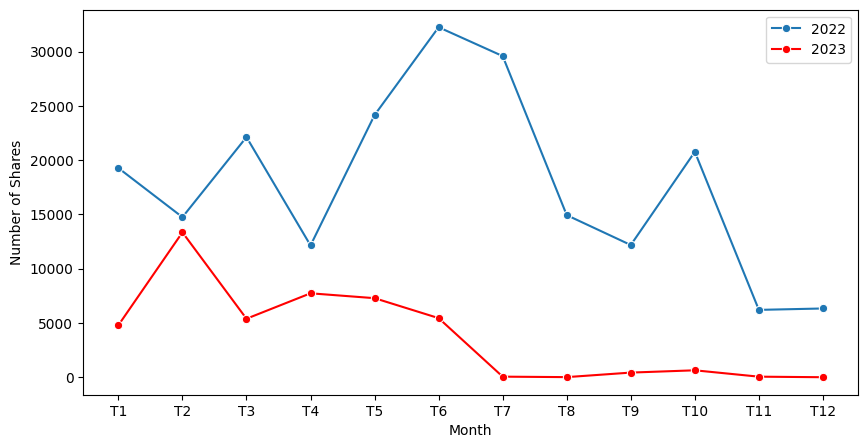

In [52]:
fig, ax= plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=list(dict.keys()), y=list(dict.values()),label='2022',marker='o')
ax= sns.lineplot(x=list(dict1.keys()),y= list(dict1.values()),color='red',marker='o',label='2023')
ax.set_ylabel("Number of Shares")
ax.set_xlabel("Month")